<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: Predicting a numerical variable based on some other combination of variables... predicting a number



In [315]:
# Import TensorFlow
import tensorflow as tf

print(tf.__version__)

2.8.0


# Create data to view and fit

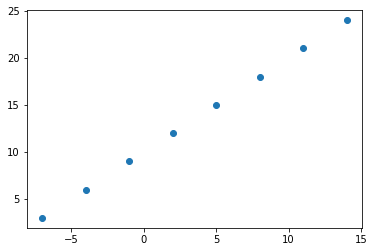

In [316]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [317]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [318]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [319]:
X[0], y[0]

(-7.0, 3.0)

In [320]:
X[1], y[1]

(-4.0, 6.0)

In [321]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [322]:
X[0].ndim

0

In [323]:
X[0], y[0]

(-7.0, 3.0)

In [324]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [325]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

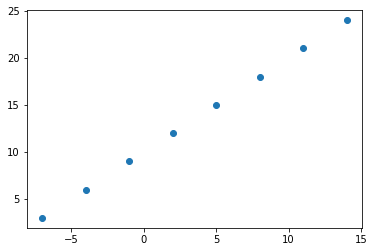

In [326]:
plt.scatter(X, y)

## steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layrs of a deep learning model.

2. **Compiling a model** - define a loss function (The function which tells our model how wrong it is.) and the optimizer (tells our model how to improve the pattersn it's learning. and evaluation metrics (What we can use to interprit the performance of out model.)

3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels)


In [327]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 291ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [328]:
# Checkout X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [329]:
y_pred = model.predict([17.0])
y_pred + 11

array([[23.71602]], dtype=float32)

# Improving our model

We can improve our model by altering the steps we took to create our model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (allso called neurons) within each of the hidden layers, change the activation functions of each layer

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of said optimization function

3. **Fitting Model** - Here we might fit a model for more **epochs** (Leave it training for longer) or on more data (Give the model more examples to learn from)

In [330]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model (This time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 292ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [331]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [332]:
# Let's see if our models prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [333]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  # tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.1), 
              metrics=["mae"])

# Fit the model (This time we will add a learning rate)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 313ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1236 - mae: 10.1236
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6736 - mae: 9.6736
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 9.2236 - mae: 9.2236
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 8.7736 - mae: 8.7736
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3236 - mae: 8.3236
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.8736 - mae: 7.8736
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4236 - mae: 7.4236
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9736 - mae: 6.9736
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8250 - mae: 6.8250
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 6.7706 - mae:

In [334]:
# Let's see if our models prediction has improved
model.predict([17.0])

array([[27.497078]], dtype=float32)

In [335]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.01), 
              metrics=["mae"])

# Fit the model (This time we will add a learning rate)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 368ms/step - loss: 14.2261 - mae: 14.2261
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.5328 - mae: 13.5328
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1611 - mae: 12.1611
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.4786 - mae: 11.4786
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7953 - mae: 10.7953
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1084 - mae: 10.1084
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4153 - mae: 9.4153
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.9998 - mae: 7.9998
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 7.

In [336]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [337]:
# Let's see if our models prediction has improved
model.predict([17.0])

array([[27.13847]], dtype=float32)

# Evaluating a model

In practice, a typical workflow you'll go through when building neural network is: 

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it..
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

it's a good idea to visualize: 
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the predictions of a model line up with the line truth(original labels)? 

In [338]:
# Make a bigger dataset 
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [339]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

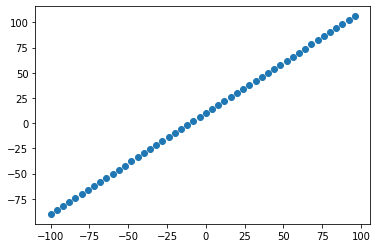

In [340]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets... 

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available
* **The test set** - the model gets evaluated on this data to test what it has learned. This set is typically 10-15% of the data available


In [341]:
# Check the length of how many samples we have
len(X)

50

In [342]:
# Split the data into train and test set

X_train = X[:40] # first 40 training samples 80% 
y_train = X[:40]
X_test = X[40:]
y_test = X[40:]
len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data split, let's Visualize it

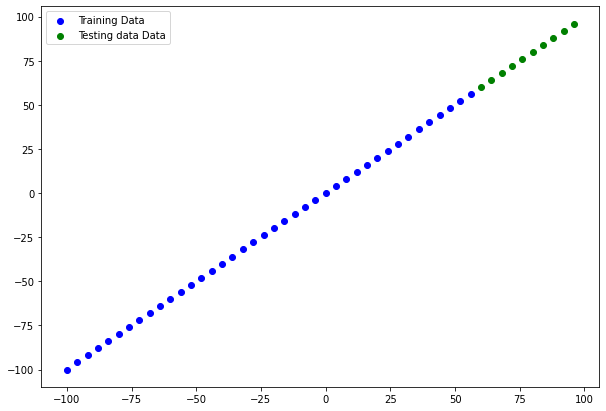

In [343]:
plt.figure(figsize=(10, 7))

#plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Testing data Data')
# Show a legend
plt.legend();

In [344]:
# Let's have a look on how to build a neural network for our data

# Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# Comipile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# Fit the model
# model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

### Visualizing the model

In [345]:
# model.summary()

In [350]:
# Let's create a model which builds automatically byt defining the input_shape argument in the first layer

tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
                             tf.keras.layers.Dense(1, name='output_layer')
], name='model1')

# Comipile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])





In [351]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model. (These are the pattersns that the model is going to learn)

* Trainable paramters - these are the parameters (patterns) the model can update as it trains

* Non-trainable params - these paramters arn't updated during training (This is typical when you bring in already learnt pattersn or parameters from other models during **Transfer Learning**

In [352]:
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [353]:
model.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


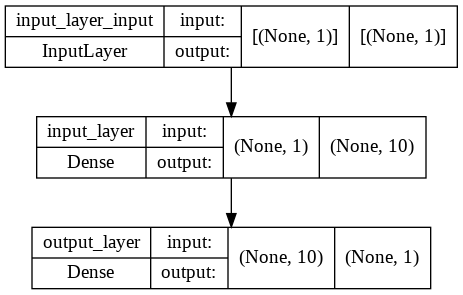

In [354]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)